In [34]:
from langgraph.graph import StateGraph, START, END
from langchain_groq import ChatGroq
from typing import TypedDict
from dotenv import load_dotenv 


In [35]:
load_dotenv()

model = ChatGroq(model="llama3-8b-8192")


In [36]:
class BlogState(TypedDict):
    title: str
    outline: str
    content: str
    evaluate: str

In [37]:
def create_outline(state: BlogState) -> BlogState:
    # fetch title
    title = state['title']

    # call llm to create outline

    prompt = f"Create a blog outline for the title: {title}"
    outline = model.invoke(prompt).content

    #update the state with the outline
    state['outline'] = outline
    return state

In [39]:
def create_blog(state: BlogState) -> BlogState:
    title = state['title']
    outline = state['outline']

    prompt = f"Create a blog for the title: {title} with the following outline: {outline}"
    content = model.invoke(prompt).content

    state['content'] = content

    return state

In [48]:
def create_evaluate(state: BlogState) -> BlogState:
    title = state['title']
    outline = state['outline']

    prompt = f"Evaluate the Blog and provide a score based on this: {title} with the following outline: {outline}"
    evaluate = model.invoke(prompt).content

    state['evaluate'] = evaluate

    return state

In [49]:
graph = StateGraph(BlogState)

# nodes
graph.add_node("create_outline", create_outline)
graph.add_node("create_blog", create_blog)
graph.add_node("create_evaluate", create_evaluate)

# edges
graph.add_edge(START, "create_outline")
graph.add_edge("create_outline", "create_blog")
graph.add_edge("create_blog", "create_evaluate")
graph.add_edge("create_evaluate", END)

workflow = graph.compile()

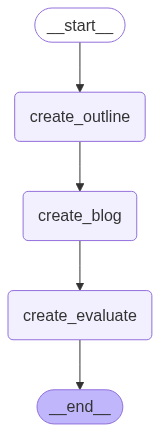

In [50]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [51]:
intial_state = {'title':"Rise of AI in the World"}

final_state = workflow.invoke(intial_state)

print(final_state)

{'title': 'Rise of AI in the World', 'outline': 'Here is a potential outline for a blog on the "Rise of AI in the World":\n\n**I. Introduction**\n\n* Brief overview of AI and its increasing presence in our daily lives\n* Thesis statement: The rise of AI is transforming the world in significant ways, and it\'s essential to understand the implications and opportunities it presents.\n\n**II. The Current State of AI**\n\n* Definition of AI and its types (narrow, general, superintelligent)\n* Examples of AI applications in various industries (healthcare, finance, transportation, education, entertainment)\n* Discussion of the benefits of AI (efficiency, accuracy, speed)\n\n**III. The Impact of AI on Jobs and Workforce**\n\n* Analysis of the impact of AI on employment (job displacement, creation of new jobs)\n* Discussion of the skills required for workers to thrive in an AI-driven economy\n* Examples of industries that are likely to be heavily impacted by AI (customer service, data entry, ma

In [52]:
print(final_state['outline'])

Here is a potential outline for a blog on the "Rise of AI in the World":

**I. Introduction**

* Brief overview of AI and its increasing presence in our daily lives
* Thesis statement: The rise of AI is transforming the world in significant ways, and it's essential to understand the implications and opportunities it presents.

**II. The Current State of AI**

* Definition of AI and its types (narrow, general, superintelligent)
* Examples of AI applications in various industries (healthcare, finance, transportation, education, entertainment)
* Discussion of the benefits of AI (efficiency, accuracy, speed)

**III. The Impact of AI on Jobs and Workforce**

* Analysis of the impact of AI on employment (job displacement, creation of new jobs)
* Discussion of the skills required for workers to thrive in an AI-driven economy
* Examples of industries that are likely to be heavily impacted by AI (customer service, data entry, manufacturing)

**IV. AI in Healthcare**

* Overview of AI applicatio

In [53]:
print(final_state['content'])

**The Rise of AI in the World: Transforming Industries and Revolutionizing Lives**

As we navigate the complexities of the 21st century, one technology has emerged as a game-changer: Artificial Intelligence (AI). Once the stuff of science fiction, AI has become an integral part of our daily lives, transforming industries and revolutionizing the way we live, work, and interact with each other.

In this blog, we'll explore the rise of AI, its current state, and its impact on various industries, including healthcare, finance, transportation, education, and more. We'll also delve into the challenges and concerns surrounding AI, and discuss the ethical and societal implications of its development and deployment.

**I. Introduction**

Artificial Intelligence has been around for decades, but its rapid development and deployment in recent years has led to a significant increase in its presence in our daily lives. From virtual assistants like Siri and Alexa to self-driving cars and AI-powered h

In [54]:
print(final_state['evaluate'])

I evaluated the blog based on the following criteria:

* Clarity and organization: 9/10
The outline is well-structured, and the sections flow logically from one to another. The language is straightforward, making it easy to follow.
* Depth and analysis: 8/10
The outline provides a good overview of the rise of AI and its applications in various industries. However, some sections, such as the impact of AI on jobs and workforce, could benefit from more in-depth analysis and data.
* Originality and creativity: 7/10
The outline does not introduce any new or revolutionary ideas, but it presents a comprehensive view of AI and its implications. The examples and applications are well-known and widely discussed.
* Engagement and tone: 8/10
The outline maintains a neutral and informative tone, which is suitable for a blog on AI. However, it may benefit from a more conversational tone to engage readers.
* Relevance and timeliness: 9/10
The topic of AI is highly relevant and timely, and the outline